In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("/content/drive/My Drive/DSN AIBootcamp 2020/Train (1).csv")

test = pd.read_csv("/content/drive/My Drive/DSN AIBootcamp 2020/Test.csv")

sample_sub = pd.read_csv("/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv")

In [ ]:
train["form_field2"].unique()

array([0.28505, 0.674  , 0.53845, ..., 0.50335, 0.39085, 2.01145])

In [ ]:
train['form_field47'] = [1 if i == 'charge' else 0 for i in train['form_field47']]
train['default_status'] = [1 if i == 'yes' else 0 for i in train['default_status']]
test['form_field47'] = [1 if i == 'charge' else 0 for i in test['form_field47']]

In [ ]:
train = train.fillna(value=0)
test = test.fillna(value=0)

In [ ]:
test = test.drop("Applicant_ID", axis = 1)
X = train.drop(columns = ['default_status', 'Applicant_ID'], axis = 1)

y = train.default_status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42, stratify = y)

In [ ]:
parameters = {'n_estimators' : (50,70,90,100, 150, 200)
              # # , 'criterion' : ('gini', 'entropy')
              , 'max_depth' : (3,5,7,9,10)
              # # , 'max_features' : ('auto', 'sqrt')
              # , 'learning_rate' : (0.1, 0.01, 0.001)
              # #, 'min_weight_fraction_leaf' : (0.0,0.1,0.2,0.3)
             }

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

Ext_grid  = GridSearchCV(ExtraTreesClassifier(n_jobs = -1, oob_score= False), param_grid = parameters, cv = 3, verbose = True)

In [ ]:
Ext_grid_model = Ext_grid.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.3min finished


In [ ]:
Ext_grid_model.best_estimator_

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=10, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

pred_score = []
test_pred = []
splits = 10
errlg = []
fold = KFold(n_splits = splits, shuffle = True, random_state = 42)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  Ext = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=10, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
  Ext.fit(X_train, y_train
          )
  
  pred_score = Ext.predict_proba(X_test)[:, 1]
  print('Logloss', log_loss(y_test, pred_score), "*"*30)
  errlg.append(log_loss(y_test, pred_score))
  p = Ext.predict_proba(test[X.columns])[:, 1]
  test_pred.append(p)

Logloss 0.43890874388811635 ******************************
Logloss 0.44049543746185804 ******************************
Logloss 0.42879139361302676 ******************************
Logloss 0.4447685000079338 ******************************
Logloss 0.4375909573125287 ******************************
Logloss 0.42709519822097014 ******************************
Logloss 0.43536471411895594 ******************************
Logloss 0.4395282440738481 ******************************
Logloss 0.4263869223819361 ******************************
Logloss 0.4379858656281176 ******************************


In [ ]:
pred_ext = np.mean(test_pred, axis=0)
sample_sub = pd.read_csv("/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv")
sample_sub.default_status = pred_ext
sample_sub.to_csv("sub_ext.csv", index = False)

In [ ]:
pip install lightgbm

In [ ]:

import lightgbm as lgb

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

pred_score = []
test_pred = []
splits = 10
errlg = []
fold = KFold(n_splits = splits, shuffle = True, random_state = 42)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]


  lgbm_Model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.4509357526501155, importance_type='split',
               learning_rate=0.1, max_depth=-1, metric='AUc',
               min_child_samples=430, min_child_weight=1e-05,
               min_split_gain=0.0, n_estimators=5000, n_jobs=4, num_leaves=21,
               objective=None, random_state=314, reg_alpha=5, reg_lambda=100,
               silent=True, subsample=0.23515663146867505,
               subsample_for_bin=200000, subsample_freq=0)
  lgbm_Model.fit(X_train, y_train)
  
  pred_score = lgbm_Model.predict_proba(X_test)[:, 1]
  pred_score = lgbm_Model.predict_proba(X_test)[:, 1]
  print('Logloss', log_loss(y_test, pred_score), "*"*30)
  errlg.append(log_loss(y_test, pred_score))  
  p = lgbm_Model.predict_proba(test[X.columns])[:, 1]
  test_pred.append(p)

Logloss 0.4434374844525944 ******************************
Logloss 0.4464065942423097 ******************************
Logloss 0.4340613448670914 ******************************
Logloss 0.4548998522331374 ******************************
Logloss 0.4402917225271993 ******************************
Logloss 0.4297166480826622 ******************************
Logloss 0.4409331573851994 ******************************
Logloss 0.44223079204700966 ******************************
Logloss 0.4300826460391007 ******************************
Logloss 0.4404972614115099 ******************************


In [ ]:
pred_ligbm = np.mean(test_pred, axis=0)
sample_sub = pd.read_csv("/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv")
sample_sub.default_status = pred_ligbm
sample_sub.to_csv("sub_lgbm.csv", index = False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

pred_score = []
test_pred = []
splits = 10
errlg = []
fold = KFold(n_splits = splits, shuffle = True, random_state = 42)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]


  RF_Model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=2020, verbose=0,
                       warm_start=False)
  RF_Model.fit(X_train, y_train
          )
  
  pred_score = RF_Model.predict_proba(X_test)[:, 1]
  print('Logloss', log_loss(y_test, pred_score), "*"*30)
  errlg.append(log_loss(y_test, pred_score))  
  p = RF_Model.predict_proba(test[X.columns])[:, 1]
  test_pred.append(p)

Logloss 0.42043290979533904 ******************************
Logloss 0.42091543783273483 ******************************
Logloss 0.40973872736893263 ******************************
Logloss 0.42584452390866856 ******************************
Logloss 0.41677221664437364 ******************************
Logloss 0.40577283084136007 ******************************
Logloss 0.4164143934379024 ******************************
Logloss 0.41960195355240215 ******************************
Logloss 0.41158653391767175 ******************************
Logloss 0.4182934630920173 ******************************


In [ ]:
pred_rfc = np.mean(test_pred, axis=0)
sample_sub = pd.read_csv("/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv")
sample_sub.default_status = pred_rfc
sample_sub.to_csv("sub_rfc.csv", index = False)

In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 49kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

pred_score = []
test_pred = []
splits = 10
errlg = []
fold = KFold(n_splits = splits, shuffle = True, random_state = 42)

for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  cat = CatBoostClassifier()
  cat.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],verbose = True,
          )
  
  pred_score = cat.predict_proba(X_test)[:, 1]
  print('Logloss', log_loss(y_test, pred_score), "*"*30)
  errlg.append(log_loss(y_test, pred_score))
  p = cat.predict_proba(test[X.columns])[:, 1]
  test_pred.append(p)

Streaming output truncated to the last 5000 lines.
35:	learn: 0.4140537	test: 0.4140537	test1: 0.4070268	best: 0.4070268 (35)	total: 2.06s	remaining: 55.3s
36:	learn: 0.4136192	test: 0.4136192	test1: 0.4067732	best: 0.4067732 (36)	total: 2.12s	remaining: 55.1s
37:	learn: 0.4131892	test: 0.4131892	test1: 0.4063717	best: 0.4063717 (37)	total: 2.17s	remaining: 55.1s
38:	learn: 0.4127372	test: 0.4127372	test1: 0.4060025	best: 0.4060025 (38)	total: 2.23s	remaining: 54.9s
39:	learn: 0.4122606	test: 0.4122606	test1: 0.4056798	best: 0.4056798 (39)	total: 2.28s	remaining: 54.6s
40:	learn: 0.4119719	test: 0.4119719	test1: 0.4053349	best: 0.4053349 (40)	total: 2.33s	remaining: 54.5s
41:	learn: 0.4116232	test: 0.4116232	test1: 0.4050999	best: 0.4050999 (41)	total: 2.38s	remaining: 54.2s
42:	learn: 0.4112278	test: 0.4112278	test1: 0.4048435	best: 0.4048435 (42)	total: 2.44s	remaining: 54.2s
43:	learn: 0.4108471	test: 0.4108471	test1: 0.4045521	best: 0.4045521 (43)	total: 2.49s	remaining: 54.2s
44:	

In [ ]:
pip install shap


     |████████████████████████████████| 327kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456465 sha256=9f9f2e883e99a0490ccf3782b36ba09cf110a145b622893db55afb423806a7a4
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [ ]:
import shap


In [ ]:
shap.initjs()


In [ ]:
explainer = shap.TreeExplainer(cat)

In [ ]:
explainer

In [ ]:
from catboost import Pool

In [ ]:
shap_values = explainer.shap_values(Pool(X_train, y_train))

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [ ]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0:50,:], X_train.iloc[0:50,:])

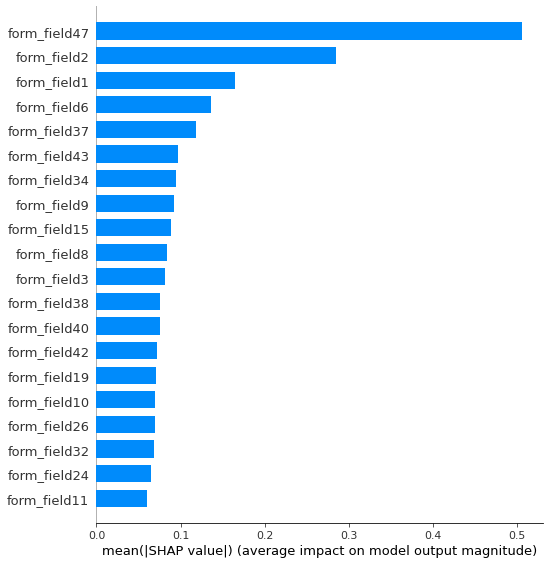

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
train['form_field1'].describe()

count    56000.000000
mean      3334.103679
std        748.120883
min          0.000000
25%       3336.000000
50%       3474.000000
75%       3610.000000
max       3900.000000
Name: form_field1, dtype: float64

In [ ]:
train['form_field1'].nunique()

450

In [ ]:
train['form_field1'].value_counts()

0.0       2529
3472.0     318
3488.0     311
3518.0     304
3502.0     293
          ... 
2994.0       1
3044.0       1
3034.0       1
3000.0       1
3020.0       1
Name: form_field1, Length: 450, dtype: int64

In [ ]:
train['form_field1'].value_counts().

,form_field1
0.0,2529
3472.0,318
3488.0,311
3518.0,304
3502.0,293
...,...
2994.0,1
3044.0,1
3034.0,1
3000.0,1


In [ ]:
pd.options.display.max_rows

60

In [ ]:
train['form_field2'].nunique()

20015

In [ ]:
pred_cat = np.mean(test_pred, axis=0)
sample_sub = pd.read_csv("/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv")
sample_sub.default_status = pred_cat
sample_sub.to_csv("sub_cat.csv", index = False)

In [ ]:
def file_reader(data):
    return pd.read_csv(data)

In [ ]:
sub_cat = file_reader('/content/sub_cat.csv')  
# sub_ext = file_reader('/content/sub_ext.csv')
sub_lgbm = file_reader('/content/sub_lgbm.csv')
# sub_rfc = file_reader('/content/sub_rfc.csv')

In [ ]:
def array(data):
    return np.array(data['default_status'])

In [ ]:
sub_cat_array = array(sub_cat)      
# sub_ext_array = array(sub_ext)   
sub_lgbm_array = array(sub_lgbm)
# sub_rfc_array = array(sub_rfc)

In [ ]:
val = (sub_cat_array*0.6 +sub_rfc_array*0.4)


In [ ]:
var = file_reader('/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv').copy()

In [ ]:
var['default_status'] = val

In [ ]:
var.to_csv('blend_cat_rfc.csv', index=False)

In [ ]:
val = (sub_cat_array*0.6 +sub_lgbm_array*0.4)

In [ ]:
var = file_reader('/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv').copy()

In [ ]:
var['default_status'] = val

In [ ]:
var.to_csv('blend_cat_lgbm3.csv', index=False)

In [ ]:
# sub_array = array(sub      #Logloss of 0.2519 on Public Lb and 0.24742
# clus_array = array(clus)   #Logloss of 0.2525 on Public Lb and 0.24718
# log_array = array(log)     #Logloss of 0.2517 on Public Lb and 0.24722

val = (sub_cat_array*0.6 +sub_lgbm_array*0.4)*0.4+(sub_lgbm_array*0.7 +sub_rfc_array*0.3)*.3 +(sub_cat_array*0.55+sub_ext_array*0.45)*0.2 +sub_ext_array*0.1

In [ ]:
var = file_reader('/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv').copy()

In [ ]:
var['default_status'] = val

In [ ]:
var.to_csv('blend_cat_lgbm_ext_rfc.csv', index=False)

In [ ]:
val = (sub_cat_array*0.6 +sub_lgbm_array*0.4)*0.4+(sub_lgbm_array*0.7 +sub_rfc_array*0.3)*.3 +(sub_cat_array*0.55+sub_ext_array*0.45)*0.2 +sub_cat_array*0.1

In [ ]:
var = file_reader('/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv').copy()

In [ ]:
var['default_status'] = val

In [ ]:
var.to_csv('blend_cat_lgbm_ext_rfc2.csv', index=False)

In [ ]:
val = (sub_cat_array*0.6 +sub_lgbm_array*0.4)*0.8+(sub_cat_array*0.7 +sub_rfc_array*0.3)*0.1 +(sub_lgbm_array*0.8+sub_rfc_array*0.2)*0.1

In [ ]:
var = file_reader('/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv').copy()


In [ ]:
var['default_status'] = val

In [ ]:
var.to_csv('blend_cat_lgbm_rfc2.csv', index=False)

In [ ]:
val = (sub_cat_array*0.85 +sub_lgbm_array*0.15)

In [ ]:
var = file_reader('/content/drive/My Drive/DSN AIBootcamp 2020/SampleSubmission.csv').copy()


In [ ]:
var['default_status'] = val

In [ ]:
var.to_csv('blend_cat_lgbm_2.csv', index=False)

In [ ]:
val = (sub_cat_array*0.80 +sub_lgbm_array*0.20)